<a href="https://colab.research.google.com/github/Siddhantg2002/Projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(test.shape)

(418, 11)


In [ ]:
train.shape

(891, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Age', ylabel='Density'>

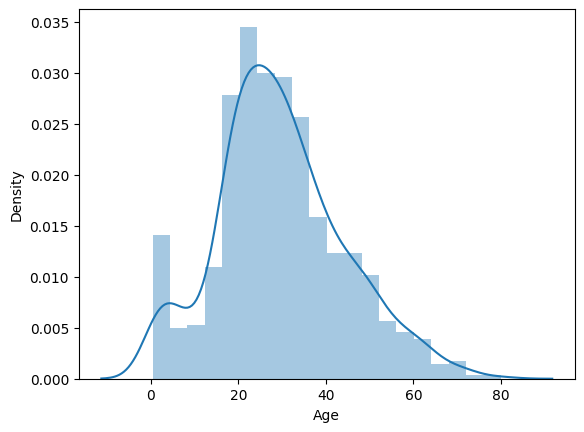

In [ ]:
sns.distplot(train['Age'])


<Axes: xlabel='Fare', ylabel='Density'>

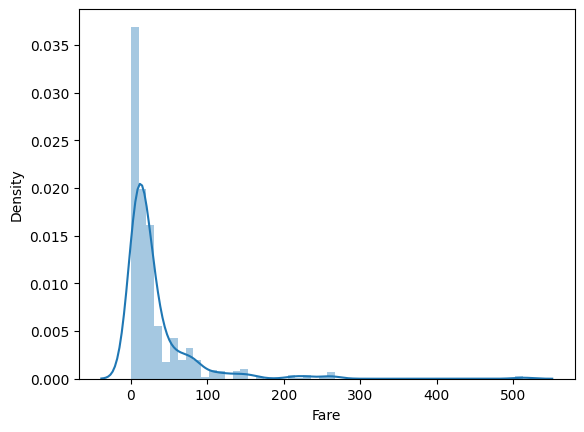

In [ ]:
sns.distplot(train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

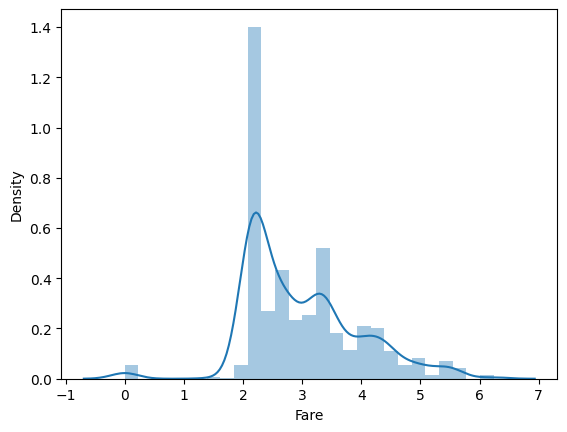

In [ ]:
df['Fare'] = np.log(df['Fare']+1)
sns.distplot(df['Fare'])


In [ ]:
train_len=len(train)
print(train_len)
df=pd.concat([train,test],axis=0)
df = df.reset_index(drop=True)
print(df.shape)
print(len(df))

891
(1309, 12)
1309


In [ ]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df.drop(columns=['Cabin','Name','Ticket'],axis=1,inplace=True)
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
label_encoder = LabelEncoder()

for col in cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


In [ ]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]
print(train.shape)
print(test.shape)

(891, 9)
(418, 9)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


In [ ]:
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

def Evaluaton_of_model(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
Evaluaton_of_model(model)

Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


In [ ]:
model = CatBoostClassifier()
model.fit(X, y)

Learning rate set to 0.009807
0:	learn: 0.6863480	total: 1.47ms	remaining: 1.47s
1:	learn: 0.6791088	total: 6.36ms	remaining: 3.17s
2:	learn: 0.6730850	total: 9.81ms	remaining: 3.26s
3:	learn: 0.6670438	total: 11.4ms	remaining: 2.85s
4:	learn: 0.6612171	total: 14.1ms	remaining: 2.8s
5:	learn: 0.6559256	total: 16.9ms	remaining: 2.8s
6:	learn: 0.6501776	total: 20.2ms	remaining: 2.86s
7:	learn: 0.6448041	total: 22.9ms	remaining: 2.84s
8:	learn: 0.6389785	total: 26ms	remaining: 2.87s
9:	learn: 0.6337792	total: 29.2ms	remaining: 2.89s
10:	learn: 0.6295823	total: 32.1ms	remaining: 2.89s
11:	learn: 0.6238853	total: 35ms	remaining: 2.88s
12:	learn: 0.6191147	total: 38ms	remaining: 2.88s
13:	learn: 0.6146894	total: 40.4ms	remaining: 2.85s
14:	learn: 0.6108572	total: 42.3ms	remaining: 2.77s
15:	learn: 0.6064272	total: 44.6ms	remaining: 2.74s
16:	learn: 0.6021318	total: 47.4ms	remaining: 2.74s
17:	learn: 0.5977094	total: 50.7ms	remaining: 2.77s
18:	learn: 0.5953404	total: 53.2ms	remaining: 2.75s


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,7.8292,1
892,893,NaN,3,0,47.0,1,0,7.0000,2
893,894,NaN,2,1,62.0,0,0,9.6875,1
894,895,NaN,3,1,27.0,0,0,8.6625,2
895,896,NaN,3,0,22.0,1,1,12.2875,2


In [ ]:
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,7.8292,1
892,3,0,47.0,1,0,7.0000,2
893,2,1,62.0,0,0,9.6875,1
894,3,1,27.0,0,0,8.6625,2
895,3,0,22.0,1,1,12.2875,2


In [ ]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [ ]:
sub = pd.read_csv('gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')
sub.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
sub.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
from google.colab import drive
drive.mount('/drive')
sub.to_csv('Titanic_Submission.csv')
!cp Titanic_Submission.csv "drive/My Drive/"

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
cp: cannot create regular file 'drive/My Drive/': No such file or directory
